# 探索性分析流程
1. 数据清洗、特征工程
2. 分析数据 可视化 统计学


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymysql import *

In [95]:
conn = connect(host='localhost',port=3306,user='root',password='root',database='spiderdata',charset='utf8')
df = pd.read_sql('select * from beikedata_community1',con=conn)
df

,id,name,subway,buildtime,structure,propertycost,propertycompany,constructionunit,size,position,quarterly_volume,monthvisit,attention,area,info,bizcircle,houseurl
0,2990,新城金樾·华府,,,板楼,1.5,None,None,407,(邛崃)拱辰大道206号,None,None,0,邛崃,板楼1.5至2.18元/平米/月西藏新城悦物业服务股份有限公司成都分公司邛崃亿睿房地产开发有...,邛崃,http://cd.ke.com/ershoufang/c1620047750294641/
1,2991,橘园路129号,,,,1.0,None,None,24,(金堂)橘园路129号,None,None,0,金堂,未知类型暂无信息暂无信息暂无信息1栋24户/四川省成都市金堂县金龙路93号,金堂,http://cd.ke.com/ershoufang/c1620055607441669/
2,2992,人民银行宿舍,,,塔板结合,1.2,None,None,36,(金堂)金龙路135号,None,None,0,金堂,塔板结合1.2元/平米/月暂无信息暂无信息2栋36户/四川省成都市金堂县金龙路93号,金堂,http://cd.ke.com/ershoufang/c1620053864438450/
3,2993,利民巷29号,,,塔楼,1.0,None,None,63,(金堂)利民巷29号,None,None,0,金堂,塔楼暂无信息暂无信息暂无信息1栋63户/四川省成都市金堂县金龙路93号,金堂,http://cd.ke.com/ershoufang/c1620054875423059/
4,2994,万安街142号,,,板楼,1.0,None,None,4,(金堂)万安街142号,None,None,0,金堂,板楼暂无信息暂无信息暂无信息1栋4户/四川省成都市金堂县赵镇滨江路一段470-472号1栋1...,金堂,http://cd.ke.com/ershoufang/c1620048911273405/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16807,19797,洗面桥横街20号,近地铁3号线衣冠庙站,1995,板楼,0.6,None,None,108,(武侯)洗面桥横街20号,None,None,6,武侯,板楼0.6元/平米/月私人承办物业无开发商4栋108户/兴蓉街27号附1号,华西,http://cd.ke.com/ershoufang/c169842339622793/
16808,19798,科华巷7号,近地铁3号线磨子桥站,1996,塔楼,1.0,None,None,36,(武侯)科华巷7号,None,None,9,武侯,塔楼暂无信息无物业管理服务无开发商1栋36户/领事馆路12号-附8,棕北,http://cd.ke.com/ershoufang/c3011052632675/
16809,19799,青城顶尚,,,,14.0,None,None,168,(都江堰)沙街路青城顶尚,None,None,2,都江堰,未知类型暂无信息暂无信息暂无信息14栋168户暂无门店信息,青城山,http://cd.ke.com/ershoufang/c1620045016240006/
16810,19800,城北风景苑西区,,,,3.0,None,None,80,(都江堰)清池路47号,None,None,1,都江堰,未知类型暂无信息暂无信息暂无信息3栋80户/四川省成都市都江堰市蒲阳路563号,都江堰,http://cd.ke.com/ershoufang/c1620033257503798/


In [96]:
#了解数据
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16812 entries, 0 to 16811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                16812 non-null  int64  
 1   name              16812 non-null  object 
 2   subway            16812 non-null  object 
 3   buildtime         16812 non-null  object 
 4   structure         16812 non-null  object 
 5   propertycost      16812 non-null  float64
 6   propertycompany   0 non-null      object 
 7   constructionunit  0 non-null      object 
 8   size              16812 non-null  int64  
 9   position          16812 non-null  object 
 10  quarterly_volume  0 non-null      object 
 11  monthvisit        0 non-null      object 
 12  attention         16812 non-null  int64  
 13  area              16812 non-null  object 
 14  info              16812 non-null  object 
 15  bizcircle         16812 non-null  object 
 16  houseurl          16812 non-null  object

In [97]:
df.replace(r'', '0')


,id,name,subway,buildtime,structure,propertycost,propertycompany,constructionunit,size,position,quarterly_volume,monthvisit,attention,area,info,bizcircle,houseurl
0,2990,新城金樾·华府,0,0,板楼,1.5,None,None,407,(邛崃)拱辰大道206号,None,None,0,邛崃,板楼1.5至2.18元/平米/月西藏新城悦物业服务股份有限公司成都分公司邛崃亿睿房地产开发有...,邛崃,http://cd.ke.com/ershoufang/c1620047750294641/
1,2991,橘园路129号,0,0,0,1.0,None,None,24,(金堂)橘园路129号,None,None,0,金堂,未知类型暂无信息暂无信息暂无信息1栋24户/四川省成都市金堂县金龙路93号,金堂,http://cd.ke.com/ershoufang/c1620055607441669/
2,2992,人民银行宿舍,0,0,塔板结合,1.2,None,None,36,(金堂)金龙路135号,None,None,0,金堂,塔板结合1.2元/平米/月暂无信息暂无信息2栋36户/四川省成都市金堂县金龙路93号,金堂,http://cd.ke.com/ershoufang/c1620053864438450/
3,2993,利民巷29号,0,0,塔楼,1.0,None,None,63,(金堂)利民巷29号,None,None,0,金堂,塔楼暂无信息暂无信息暂无信息1栋63户/四川省成都市金堂县金龙路93号,金堂,http://cd.ke.com/ershoufang/c1620054875423059/
4,2994,万安街142号,0,0,板楼,1.0,None,None,4,(金堂)万安街142号,None,None,0,金堂,板楼暂无信息暂无信息暂无信息1栋4户/四川省成都市金堂县赵镇滨江路一段470-472号1栋1...,金堂,http://cd.ke.com/ershoufang/c1620048911273405/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16807,19797,洗面桥横街20号,近地铁3号线衣冠庙站,1995,板楼,0.6,None,None,108,(武侯)洗面桥横街20号,None,None,6,武侯,板楼0.6元/平米/月私人承办物业无开发商4栋108户/兴蓉街27号附1号,华西,http://cd.ke.com/ershoufang/c169842339622793/
16808,19798,科华巷7号,近地铁3号线磨子桥站,1996,塔楼,1.0,None,None,36,(武侯)科华巷7号,None,None,9,武侯,塔楼暂无信息无物业管理服务无开发商1栋36户/领事馆路12号-附8,棕北,http://cd.ke.com/ershoufang/c3011052632675/
16809,19799,青城顶尚,0,0,0,14.0,None,None,168,(都江堰)沙街路青城顶尚,None,None,2,都江堰,未知类型暂无信息暂无信息暂无信息14栋168户暂无门店信息,青城山,http://cd.ke.com/ershoufang/c1620045016240006/
16810,19800,城北风景苑西区,0,0,0,3.0,None,None,80,(都江堰)清池路47号,None,None,1,都江堰,未知类型暂无信息暂无信息暂无信息3栋80户/四川省成都市都江堰市蒲阳路563号,都江堰,http://cd.ke.com/ershoufang/c1620033257503798/


<AxesSubplot:>

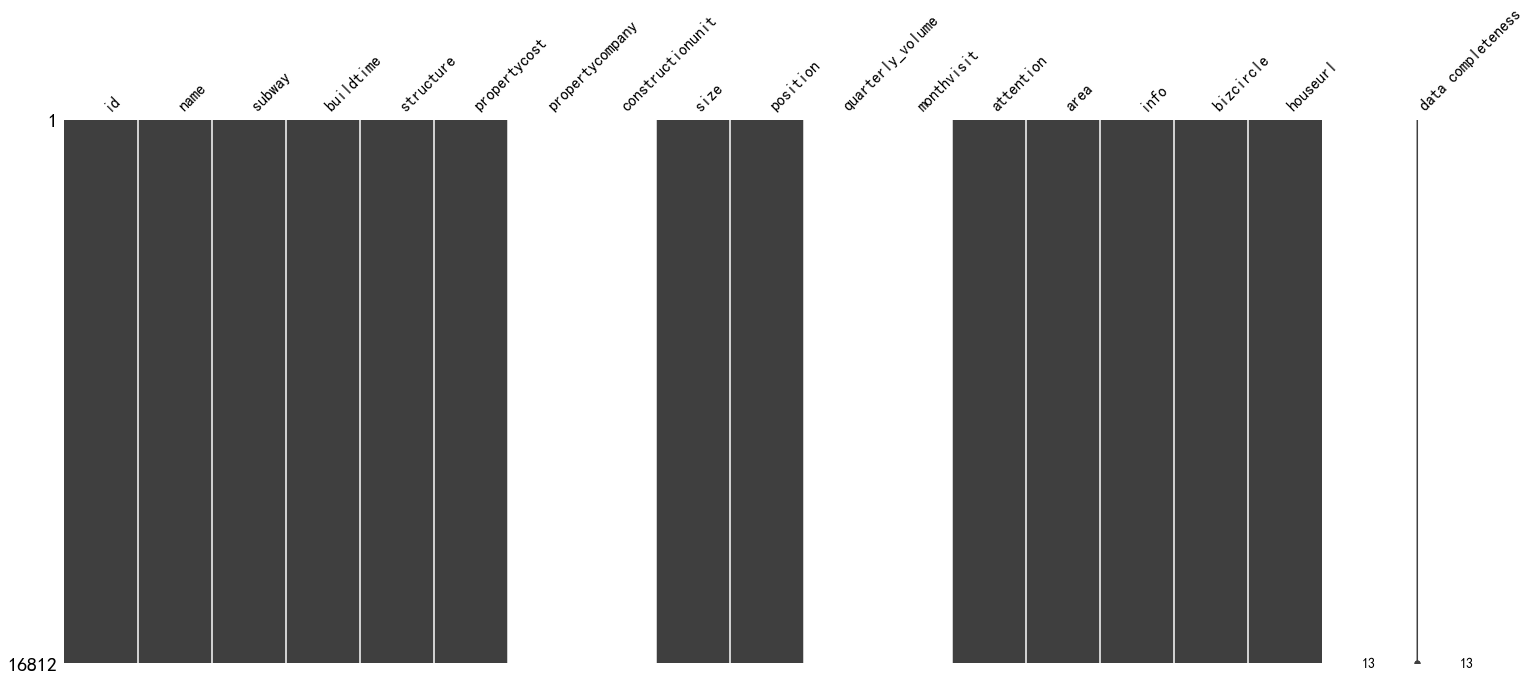

In [98]:
import missingno as msno
msno.matrix(df,labels=True)

In [105]:

df.replace(r'', '0')
# df.fillna(0)

,id,name,subway,buildtime,structure,propertycost,propertycompany,constructionunit,size,position,quarterly_volume,monthvisit,attention,area,info,bizcircle,houseurl
0,2990,新城金樾·华府,0,0,板楼,1.5,None,None,407,(邛崃)拱辰大道206号,None,None,0,邛崃,板楼1.5至2.18元/平米/月西藏新城悦物业服务股份有限公司成都分公司邛崃亿睿房地产开发有...,邛崃,http://cd.ke.com/ershoufang/c1620047750294641/
1,2991,橘园路129号,0,0,0,1.0,None,None,24,(金堂)橘园路129号,None,None,0,金堂,未知类型暂无信息暂无信息暂无信息1栋24户/四川省成都市金堂县金龙路93号,金堂,http://cd.ke.com/ershoufang/c1620055607441669/
2,2992,人民银行宿舍,0,0,塔板结合,1.2,None,None,36,(金堂)金龙路135号,None,None,0,金堂,塔板结合1.2元/平米/月暂无信息暂无信息2栋36户/四川省成都市金堂县金龙路93号,金堂,http://cd.ke.com/ershoufang/c1620053864438450/
3,2993,利民巷29号,0,0,塔楼,1.0,None,None,63,(金堂)利民巷29号,None,None,0,金堂,塔楼暂无信息暂无信息暂无信息1栋63户/四川省成都市金堂县金龙路93号,金堂,http://cd.ke.com/ershoufang/c1620054875423059/
4,2994,万安街142号,0,0,板楼,1.0,None,None,4,(金堂)万安街142号,None,None,0,金堂,板楼暂无信息暂无信息暂无信息1栋4户/四川省成都市金堂县赵镇滨江路一段470-472号1栋1...,金堂,http://cd.ke.com/ershoufang/c1620048911273405/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16807,19797,洗面桥横街20号,近地铁3号线衣冠庙站,1995,板楼,0.6,None,None,108,(武侯)洗面桥横街20号,None,None,6,武侯,板楼0.6元/平米/月私人承办物业无开发商4栋108户/兴蓉街27号附1号,华西,http://cd.ke.com/ershoufang/c169842339622793/
16808,19798,科华巷7号,近地铁3号线磨子桥站,1996,塔楼,1.0,None,None,36,(武侯)科华巷7号,None,None,9,武侯,塔楼暂无信息无物业管理服务无开发商1栋36户/领事馆路12号-附8,棕北,http://cd.ke.com/ershoufang/c3011052632675/
16809,19799,青城顶尚,0,0,0,14.0,None,None,168,(都江堰)沙街路青城顶尚,None,None,2,都江堰,未知类型暂无信息暂无信息暂无信息14栋168户暂无门店信息,青城山,http://cd.ke.com/ershoufang/c1620045016240006/
16810,19800,城北风景苑西区,0,0,0,3.0,None,None,80,(都江堰)清池路47号,None,None,1,都江堰,未知类型暂无信息暂无信息暂无信息3栋80户/四川省成都市都江堰市蒲阳路563号,都江堰,http://cd.ke.com/ershoufang/c1620033257503798/


In [70]:
df.structure.value_counts()

板楼      7680
塔板结合    5874
        2091
塔楼      1167
Name: structure, dtype: int64

In [86]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

([<matplotlib.axis.XTick at 0x1cede12f670>,
 [Text(0, 0, '板楼'), Text(1, 0, '塔板结合'), Text(2, 0, '无信息'), Text(3, 0, '塔楼')])

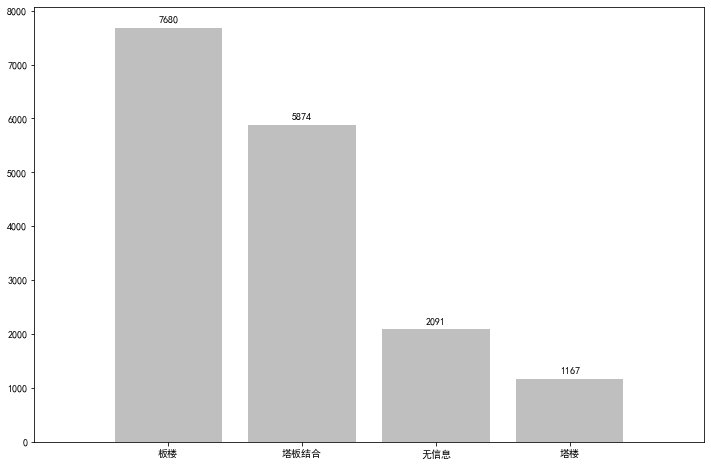

In [87]:
fig = plt.figure(figsize=(12,8))
plt.bar(range(4),df.structure.value_counts(),color='gray',alpha=0.5)
plt.xlim(-1,4)
plt.title = '建筑结构类型统计'
for x,y in enumerate(df.structure.value_counts()):
    plt.text(x,y+100,y,ha='center')
plt.xticks(range(4),['板楼','塔板结合','无信息','塔楼'])